## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Суховерхова Диана

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [ ]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """

        self.metric = metric
        self.k = k

        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train

        return self

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)

        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        if self.metric == "euclid":
            p = 2
        else:
            p = 1

        y_pred = np.zeros((X_test.shape[0], 1))

        for m in range(X_test.shape[0]):  # для каждого объекта тестовой выборки (m штук)
            y_num = 0.0
            y_denom = 0.0
            help_arr = np.zeros((1, X_train.shape[
                0]))  # сохраняются все расстояния, затем из отсортированного массива выберутся k ближайших соседей
            dist_arr = np.array([[0.0] * 2 for i in range(X_train.shape[0])])
            for i in range(len(help_arr[0])):  # l объектов тренировочной выборки
                for j in range(X_train.shape[1]):  # d признаков
                    help_arr[0][i] += (X_train[i][j] - X_test[m][j]) ** p
                help_arr[0][i] = (help_arr[0][i]) ** (1 / p)
                dist_arr[i][0] = help_arr[0][i]
                dist_arr[i][1] = i

            dist_arr = sorted(dist_arr, key=lambda i: i[0])
            k_arr = np.array(dist_arr[:self.k])  # выбрали k ближайших
            for q in range(self.k):
                w_arr = float(1 / k_arr[q][0])
                ind = int(k_arr[q][1])
                y_num += w_arr * self.y_train[ind]
                y_denom += w_arr

            y_pred[m] = y_num / y_denom
        return y_pred

In [ ]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [ ]:
knn = KNN(metric='euclid', k = 6)
knn.fit(X_train, y_train)
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_train, y_train)
print(mean_squared_error(knn.predict(X_test), neigh.predict(X_test)))

1.7975350247450599


In [ ]:
knn1 = KNN(metric='manhattan', k = 15)
knn1.fit(X_train, y_train)
neigh1 = KNeighborsRegressor(n_neighbors=15, p=1)
neigh1.fit(X_train, y_train)
print(mean_squared_error(knn1.predict(X_test), neigh1.predict(X_test)))

0.2200189155457358


In [ ]:
knn2 = KNN(metric='manhattan', k = 5)
knn2.fit(X_train, y_train)
neigh2 = KNeighborsRegressor(n_neighbors=5, p=1)
neigh2.fit(X_train, y_train)
print(mean_squared_error(knn2.predict(X_test), neigh2.predict(X_test)))

0.37823271984088636


In [ ]:
knn3 = KNN(metric='euclid', k = 30)
knn3.fit(X_train, y_train)
neigh3 = KNeighborsRegressor(n_neighbors=30)
neigh3.fit(X_train, y_train)
print(mean_squared_error(knn3.predict(X_test), neigh3.predict(X_test)))

0.04814534974182829


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [ ]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta

        self.w = None
        self.loss_history = None

    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.w = np.zeros((X_train.shape[1],))
        self.loss_history = np.zeros((self.max_iter,))
        i = -1
        while i + 1 < self.max_iter:
          i += 1
          w_t1 = self.w[:]
          grad_calc = self.calc_gradient(X_train, y_train)
          self.w = w_t1 - self.eta * grad_calc
          if np.linalg.norm(self.w - w_t1) < self.tol:
            break
          self.loss_history[i] = self.calc_loss(X_train, y_train)

        return self.loss_history

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)

        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = X_test.dot(self.w)
        return y_pred

    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.

        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)

        OUTPUT:
        grad - np.array of shape (d,)
        """
        grad = np.zeros((X.shape[1],))
        for j in range(X.shape[1]):
          for i in range(X.shape[0]):
            if abs(y[i] - X[i].dot(self.w)) <= self.delta:
              grad[j] -= X[i][j]
            elif y[i] - X[i].dot(self.w) > 0:
              grad[j] += self.delta * X[i][j] * (-1)
            else:
              grad[j] += self.delta * X[i][j]
        return grad / X.shape[0]

    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.

        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)

        OUTPUT:
        loss - float
        """
        res = 0.0
        for i in range(X.shape[0]):
            if abs(y[i] - X[i].dot(self.w)) <= self.delta:
              res += (y[i] - X[i].dot(self.w))**2 / 2
            else:
              res += self.delta * abs(y[i]-X[i].dot(self.w)) - self.delta**2 / 2
        return res / X.shape[0]


In [ ]:
linregr = LinearRegressionHuber()
linregr.loss_history = linregr.fit(X_train, y_train)
linregr_auto = LinearRegression()
linregr_auto.fit(X_train, y_train)
print(mean_squared_error(linregr.predict(X_test), linregr_auto.predict(X_test)))

0.16969861842316972


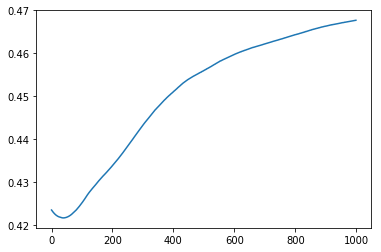

In [ ]:
i = range(linregr.loss_history.shape[0])
plt.plot(i, linregr.loss_history[i]);

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from math import sqrt

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [ ]:
data = pd.read_csv('train.csv', header=0)

In [ ]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [ ]:
data.isnull().any().any()

True

In [ ]:
nans = data.loc[:, data.isnull().any()].copy()
nans.columns

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [ ]:
print "LotFrontage: всего пропусков - " + str(data.LotFrontage.isnull().sum()) + ', доля - ' + str((data.LotFrontage.isnull().sum()*100)/len(data.LotFrontage)) + '%'
print "Alley: всего пропусков - " + str(data.Alley.isnull().sum()) + ', доля - ' + str((data.Alley.isnull().sum()*100)/len(data.Alley)) + '%'
print "MasVnrType: всего пропусков - " + str(data.MasVnrType.isnull().sum()) + ', доля - ' + str((data.MasVnrType.isnull().sum()*100)/len(data.MasVnrType)) + '%'
print "MasVnrArea: всего пропусков - " + str(data.MasVnrArea.isnull().sum()) + ', доля - ' + str((data.MasVnrArea.isnull().sum()*100)/len(data.MasVnrArea)) + '%'
print "BsmtQual: всего пропусков - " + str(data.BsmtQual.isnull().sum()) + ', доля - ' + str((data.BsmtQual.isnull().sum()*100)/len(data.BsmtQual)) + '%'
print "BsmtCond: всего пропусков - " + str(data.BsmtCond.isnull().sum()) + ', доля - ' + str((data.BsmtCond.isnull().sum()*100)/len(data.BsmtCond)) + '%'
print "BsmtExposure: всего пропусков - " + str(data.BsmtExposure.isnull().sum()) + ', доля - ' + str((data.BsmtExposure.isnull().sum()*100)/len(data.BsmtExposure)) + '%'
print "BsmtFinType1: всего пропусков - " + str(data.BsmtFinType1.isnull().sum()) + ', доля - ' + str((data.BsmtFinType1.isnull().sum()*100)/len(data.BsmtFinType1)) + '%'
print "BsmtFinType2: всего пропусков - " + str(data.BsmtFinType2.isnull().sum()) + ', доля - ' + str((data.BsmtFinType2.isnull().sum()*100)/len(data.BsmtFinType2)) + '%'
print "Electrical: всего пропусков - " + str(data.Electrical.isnull().sum()) + ', доля - ' + str((data.Electrical.isnull().sum()*100)/len(data.Electrical)) + '%'
print "FireplaceQu: всего пропусков - " + str(data.FireplaceQu.isnull().sum()) + ', доля - ' + str((data.FireplaceQu.isnull().sum()*100)/len(data.FireplaceQu)) + '%'
print "GarageType: всего пропусков - " + str(data.GarageType.isnull().sum()) + ', доля - ' + str((data.GarageType.isnull().sum()*100)/len(data.GarageType)) + '%'
print "GarageYrBlt: всего пропусков - " + str(data.GarageYrBlt.isnull().sum()) + ', доля - ' + str((data.GarageYrBlt.isnull().sum()*100)/len(data.GarageYrBlt)) + '%'
print "GarageFinish: всего пропусков - " + str(data.GarageFinish.isnull().sum()) + ', доля - ' + str((data.GarageFinish.isnull().sum()*100)/len(data.GarageFinish)) + '%'
print "GarageQual: всего пропусков - " + str(data.GarageQual.isnull().sum()) + ', доля - ' + str((data.GarageQual.isnull().sum()*100)/len(data.GarageQual)) + '%'
print "GarageCond: всего пропусков - " + str(data.GarageCond.isnull().sum()) + ', доля - ' + str((data.GarageCond.isnull().sum()*100)/len(data.GarageCond)) + '%'
print "PoolQC: всего пропусков - " + str(data.PoolQC.isnull().sum()) + ', доля - ' + str((data.PoolQC.isnull().sum()*100)/len(data.PoolQC)) + '%'
print "Fence: всего пропусков - " + str(data.Fence.isnull().sum()) + ', доля - ' + str((data.Fence.isnull().sum()*100)/len(data.Fence)) + '%'
print "MiscFeature: всего пропусков - " + str(data.MiscFeature.isnull().sum()) + ', доля - ' + str((data.MiscFeature.isnull().sum()*100)/len(data.MiscFeature)) + '%'

LotFrontage: всего пропусков - 259, доля - 17%
Alley: всего пропусков - 1369, доля - 93%
MasVnrType: всего пропусков - 8, доля - 0%
MasVnrArea: всего пропусков - 8, доля - 0%
BsmtQual: всего пропусков - 37, доля - 2%
BsmtCond: всего пропусков - 37, доля - 2%
BsmtExposure: всего пропусков - 38, доля - 2%
BsmtFinType1: всего пропусков - 37, доля - 2%
BsmtFinType2: всего пропусков - 38, доля - 2%
Electrical: всего пропусков - 1, доля - 0%
FireplaceQu: всего пропусков - 690, доля - 47%
GarageType: всего пропусков - 81, доля - 5%
GarageYrBlt: всего пропусков - 81, доля - 5%
GarageFinish: всего пропусков - 81, доля - 5%
GarageQual: всего пропусков - 81, доля - 5%
GarageCond: всего пропусков - 81, доля - 5%
PoolQC: всего пропусков - 1453, доля - 99%
Fence: всего пропусков - 1179, доля - 80%
MiscFeature: всего пропусков - 1406, доля - 96%


Схожие признаки (характеризующие одну и ту же составляющую дома) имеют одинаковое количество пропусков

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

1)LotFrontage - заполняется средним значением длины улицы

In [ ]:
data.LotFrontage.fillna(data.LotFrontage.mean(), inplace=True)

2)Alley - так как пропусков 94%, то столбец можно удалить

In [ ]:
data.drop('Alley', axis=1, inplace=True)

3) MasVnrType - заполняется самым популярным типом облицовки

In [ ]:
data.MasVnrType.fillna(data.MasVnrType.mode()[0], inplace=True)

4) MasVnrArea - заполняется средним значением площали

In [ ]:
data.MasVnrArea.fillna(data.MasVnrArea.mean(), inplace=True)

5)BsmtQual - заполняется самым популярным значением 

In [ ]:
data.BsmtQual.fillna(data.BsmtQual.mode()[0], inplace=True)

6)BsmtCond - заполняется самым популярным значением

In [ ]:
data.BsmtCond.fillna(data.BsmtCond.mode()[0], inplace=True)

7)BsmtExposure - заполняется самым популярным значением

In [ ]:
data.BsmtExposure.fillna(data.BsmtExposure.mode()[0], inplace=True)

8)BsmtFinType1 - заполняется самым популярным значением

In [ ]:
data.BsmtFinType1.fillna(data.BsmtFinType1.mode()[0], inplace=True)

9)BsmtFinType2 - заполняется самым популярным значением

In [ ]:
data.BsmtFinType2.fillna(data.BsmtFinType2.mode()[0], inplace=True)

10)Electrical - заполняется самым популярным типом электрической системы

In [ ]:
data.Electrical.fillna(data.Electrical.mode()[0], inplace=True)

11)FireplaceQu - так как пропусков 47% (почти половина всех значений), то столбец можно удалить

In [ ]:
data.drop('FireplaceQu', axis=1, inplace=True)

12)GarageType - заполняется самым популярным значением типа

In [ ]:
data.GarageType.fillna(data.GarageType.mode()[0], inplace=True)

13)GarageYrBlt - заполняется средним значением года постройки гаража

In [ ]:
data.GarageYrBlt.fillna(data.GarageYrBlt.mean(), inplace=True)

14)GarageFinish - заполняется самым популярным значением

In [ ]:
data.GarageFinish.fillna(data.GarageFinish.mode()[0], inplace=True)

15)GarageQual - заполняется самым популярным значением

In [ ]:
data.GarageQual.fillna(data.GarageQual.mode()[0], inplace=True)

16)GarageCond - заполняется самым популярным значением

In [ ]:
data.GarageCond.fillna(data.GarageCond.mode()[0], inplace=True)

17)PoolQC - так как пропусков 99%, то столбец можно удалить

In [ ]:
data.drop('PoolQC', axis=1, inplace=True)

18)Fence - так как пропусков 80%, то столбец можно удалить

In [ ]:
data.drop('Fence', axis=1, inplace=True)

19)MiscFeature - так как пропусков 96%, то столбец можно удалить

In [ ]:
data.drop('MiscFeature', axis=1, inplace=True)

In [ ]:
data.isnull().any().any()

False

Пропусков нет

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [ ]:
categ = (data.dtypes == "object").values # категориальные признаки имеют тип "object"

In [ ]:
data_dum = pd.get_dummies(data, drop_first=True) # если N значений категориального признака, то его можно закодировать N - 1 столбцом \\
# получилась вещественная матрица
data_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,...,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,...,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Функция get_dummies применила метод one-hot-encoding к матрице - каждый категориальный признак, принимающий N значений, был закодирован N-1 столбцом. Метод one-hot-encoding выбран потому, что так можно интерпретировать даннные в терминах precision/recall (в отличие от, например, метода label encoding).

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

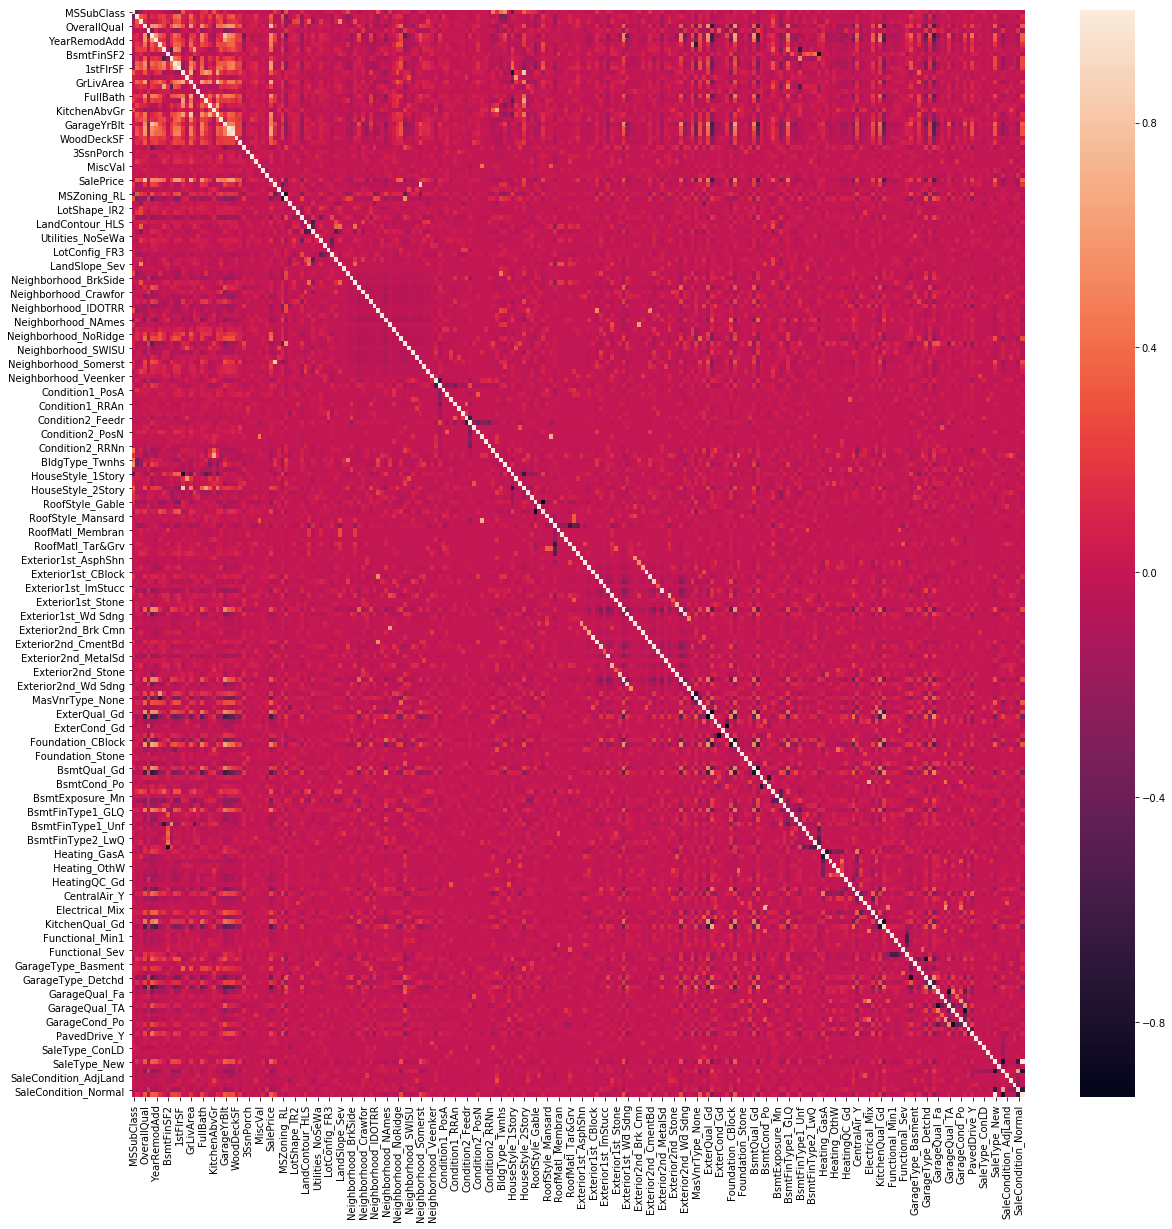

In [ ]:
crr = data_dum.corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(crr);

Первые 10 признаков сильно коррелируют между собой, остальные же почти не коррелируют

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [ ]:
# чем выше абсолютное значение коэффициента Пирсона, тем сильнее исследуемые переменные линейно связаны между собой
max_v = 0
min_v = 1
for i in range(crr.shape[0]):
  if 1 > abs(crr.SalePrice[i]) > abs(crr.SalePrice[max_v]):
    max_v = i
  if 0 < abs(crr.SalePrice[i]) < abs(crr.SalePrice[min_v]):
    min_v = i
print crr.columns[max_v:max_v+1][0], crr.columns[min_v:min_v+1][0]

OverallQual BsmtFinSF2


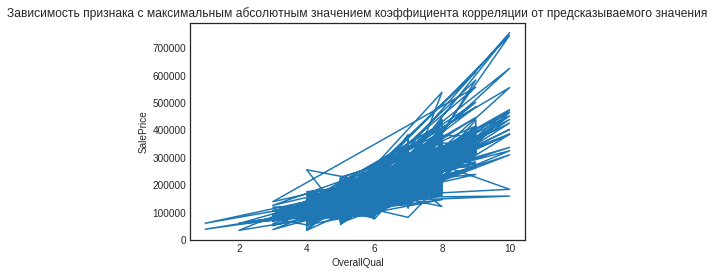

In [ ]:
plt.plot(data.OverallQual, data.SalePrice);
plt.xlabel(u"OverallQual")
plt.ylabel(u"SalePrice");
plt.title(u"Зависимость признака с максимальным абсолютным значением коэффициента корреляции от предсказываемого значения");
plt.show()

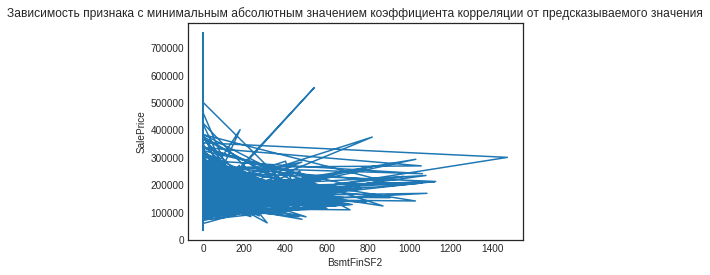

In [ ]:
plt.plot(data.BsmtFinSF2, data.SalePrice);
plt.xlabel(u"BsmtFinSF2")
plt.ylabel(u"SalePrice");
plt.title(u"Зависимость признака с минимальным абсолютным значением коэффициента корреляции от предсказываемого значения");
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
y = data_dum.SalePrice.to_numpy()
X = data_dum.drop('SalePrice', axis=1).to_numpy()

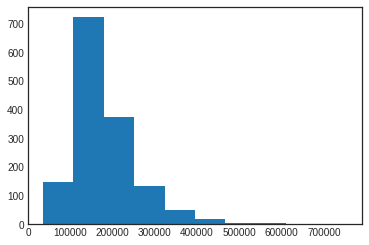

In [ ]:
plt.style.use('seaborn-white')
plt.hist(y);

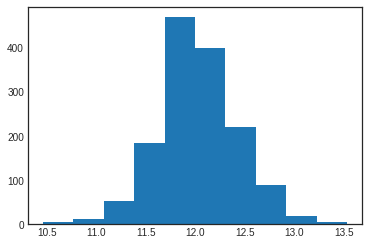

In [ ]:
y_l = np.log1p(y)
plt.hist(y_l);

Новая переменная имеет приблизительно нормальное распределение, в то время как изначально целевая переменная имела распределение, не похожее на нормальное. У новой переменной значения, который далеко отстают от среднего, почти не учитываются, что означает, что такие данные не будут сильно влиять на обучение.

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 232), (365, 232), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [ ]:
max_sc = 0
i_mem = 0
for i in range(1, 100):
  knn_house = KNeighborsRegressor(n_neighbors = i)
  hp = np.sum(cross_val_score(knn_house, X_train, y_train, cv=5)) / 5
  if hp  > max_sc:
    max_sc = hp
    i_mem = i
print i_mem

7


In [ ]:
knn_h = KNeighborsRegressor(n_neighbors=7)
knn_h.fit(X_train, y_train)
print sqrt(mean_squared_error(y_val, knn_h.predict(X_val)))

39846.8317837


In [ ]:
max_sc = 0
i_mem = 0
for i in range(1, 100):
  linregr_house = LinearRegression()
  hp = np.sum(cross_val_score(linregr_house, X_train, y_train, cv=5)) / 5
  if hp  > max_sc:
    max_sc = hp
    i_mem = i
print i_mem

1


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Решение: 
 
1) $z>0$: $$\left(\sum\limits_{i=1}^{l}\tau z(y_i-C)\right)'_{z}=\sum\limits_{i=1}^{l}\tau (y_i-C)=0$$ \\
$$ \sum\limits_{i=1}^{l}\tau y_i-l\tau C = 0$$ \\
$$ C= \dfrac{1}{l\tau}\sum\limits_{i=1}^{l}\tau y_i = \dfrac{\sum\limits_{i=1}^{l}y_i}{l}$$

2) $z \leq 0$: $$\left(\sum\limits_{i=1}^{l}(\tau-1)z(y_i-C)\right)'_{z}=\sum\limits_{i=1}^{l}(\tau-1)(y_i-C)=0$$ \\
$$ \sum\limits_{i=1}^{l}(\tau-1)y_i-l(\tau-1)C = 0$$ \\
$$ C= \dfrac{1}{l(\tau-1)}\sum\limits_{i=1}^{l}(\tau-1)y_i = \dfrac{\sum\limits_{i=1}^{l}y_i}{l}$$

Ответ: $C=\dfrac{\sum\limits_{i=1}^{l}y_i}{l}$